<a href="https://colab.research.google.com/github/jford59/ML1/blob/main/ML1/HW3/ML3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy =  0.8859649122807017
Precision =  0.8372093023255814
Recall =  0.8571428571428571
F1 Score =  0.8470588235294119


Text(0.5, 427.9555555555555, 'Predicted Label')

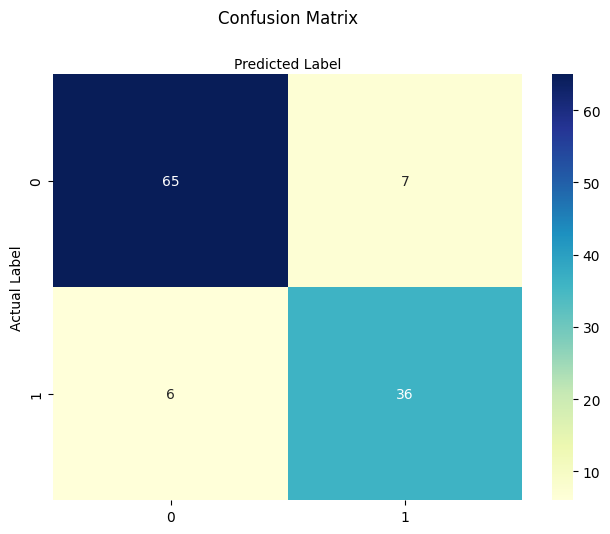

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))

cancer.isnull().sum()*100/cancer.shape[0]

cancer.pop("id")
cancer.pop("Unnamed: 32")

cancer["diagnosis"] = cancer["diagnosis"].map({'M':1,'B':0})

y = cancer.pop("diagnosis")
x = cancer.values

pca = PCA(n_components=16)
pca_x = pca.fit_transform(x)

np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(pca_x, y, train_size = 0.8)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

model = GaussianNB()

model.fit(x_train, y_train)

pred = model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
F1 = (2*precision*recall)/(precision+recall)
print('Accuracy = ', accuracy)
print('Precision = ', precision)
print('Recall = ', recall)
print('F1 Score = ', F1)

class_names = ['Benign','Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')